# Radioactivity in Air Analysis

## Introduction

The goal of this experiment is to measure and identify radioactive substances in the air with high accuracy and specificity. Isotopes of interest include:

1. Uranium-238 => Lead-206
2. Thorium-232 => Lead-208
3. Uranian-235 => Lead-207

Our criteria for differentiating isotopes depends on ____

### Equipment

1. Geiger-Mueller Tube: Radiation measurement.
    * Tube has ionized gas, any ionizing radiation causes a negative charge accumulation.
2. Picker-Scaler: Power supply.
3. DAQ/Computer Setup.

## Data Collection

### Session I: Cesium-137 Calibration Data for Voltage & Background Radiation Measurement

- Collecting data for Cesium-137 source.
- Plot data in python, taking plateau curve for data ⇒ determine operating voltage.
- Collecting data on background radiation.

### Session 2:

- Air sampler used to retrieve air samples ⇒ analysis of the model.
- "Radioactivity in Air" program is used to collect data from Geiger-Mueller tubes (counts number of beta(?) particle emissions in a given time span).
- Note that the filter on the GM tube is thin enough to let in **beta particles** and thick enough to **stop alpha particles**.
    - Therefore, we are counting **only beta particles**.
    
# The Model

## Approach to Data Analysis

- Multiple levels of sophistication:
- **EASY METHOD:**
    - Constant background subtraction of your data
    - Use a semi-logarithmic plot, find rough **half-life** and **total counting rate** by the end of the sampling period.
- **Full-Blown Analysis:**
    - Observing gamma-rays from filter paper.

## Parts of the Model

Model for **counts registered** in the detector:

### Part I: **Constant background** from no sample:

1. Result of cosmic rays and gamma-rays in the room.
2. Average number of counts per time period is easily calculated from the background data collection.
3. The goal is `<= 1 count per minute` of error.
4. Determine the background under **identical conditions** to the experiment.
5. **If you observe `n` counts, the standard error is `\sqrt{n}`**

### Part II: **Decay of long-lived isotopes accumulated on filter paper:**

1. Dominated by decay of "4n" series made from Thorium-232
    1. Results in Rn-220 (0.145s) → Po-216 (10.64h) → Bi-212 (1.00h) → Po-212 (0.3 us)
2. Half life of 10.64 hours for Po-216 will dominate activity.
3. Longer-lived components can be identified with `semi-logarithmic` plot of **detector counts with background subtracted.**
    1. Only for times after the half-hour activity from Rn-222 have decayed.
    2. Only the **first half hour** of data is relevant to the short-lived products of **Radon-222.**
4. `In Python`: Make a **linear fit** of data **after the half-hour** from the air sample.
    1. If good linear fit: subtract this component from the total data ⇒ corrected data ⇒ third part of the model.

### Part III: **Decay of products of Radon-222**:

**Secular Equilibrium:**

- Radon-222 → Po-218. Po-218 is highly *ionized* ⇒ becomes attached to dust.
    - The next beta decay produce Pb-214 and B-214 (also highly ionized), with half lives of ~0.5 hours.
    - These products also attach themselves to dust particles.
- Number of **isotopic breakdowns** per second for each is proportional to the amount of that isotope that is present.
    - More Po-218 ⇒ more decay per second ⇒ build up an equilibrium depending on lifetime of Po-218 and the amount being formed from it's **predecessor Radon.**
    - **At equilibrium**: Number of Po-218 created = number of Po-218 destroyed per second.
        - This type of equilibrium continues down the chain...
    - This is called **`SECULAR EQUILIBRIUM` ⇒** holds whenever **parent** has long half life compared to next generation(s).
- Therefore, **MEASUREMENT OF DISINTEGRATION RATE OF ANY MEMBER OF THE SERIES ⇒ ACTIVITY OF RADON PRESENT.**
- All beta activity in air can be accounted for given decay of Pb-214 and Bi-214 (after alpha particles were eliminated by that aluminum filter).
- *If model fits data*: If we determine the amount of **`Pb-214`,** we can get the **CONCENTRATION OF RADON IN THE ATMOSPHERE.**

## Mathematical Model of Daughters of Radon-222

- After filtering is stopped, the few alpha-emitting Po-218 atoms don't affect much, especially after the first 10-15 minutes where it increases the amount of Pb-214.
- Subsequent counting rate = only because of **Pb-214 and Bi-214**.
- Rest of the model will neglect any build-up of Pb-214 from Po-218 on the filter paper.

...

- Variation of counting rate over time = f(decay constant_Pb-214, decay constant_Bi-214).
    - A_B(t) = *actual activity of Pb-214 (RaB) at time t.*
    - A_C(t) = *actual activity of Bi-214 (RaC) at time t.*
- The **ratio of isotope B (Pb-214)** and **isotope C (Bi-214)** at time zero is:

$$R = \frac{A_c(0)}{A_B(0)}$$

- `Observed counting rate` = `real activity` x `efficiency`  (efficiency = \varepsilon)
    - efficiency is not 1 because low-energy beta particles tend to be stopped by the aluminum foil.
- Beta particle energy spectra ranges from `0 -> E_max`
    - `E_max` is higher for Bi-214 than for Pb-214
    - \varepsilon is therefore larger for Bi-214
    - For 27 um thick foil and window of density 1.5mg/cm^2, we have:

$$\varepsilon_C = 0.95, \varepsilon_B = 0.80 ⇒ \varepsilon_C/\varepsilon_B = 0.1$$

- If we say

$$A^{obs}_B(t) = \varepsilon_B A_B(t); \,\,\, A^{obs}_C(t) = \varepsilon_CA_C(t)$$

- Where *obs* denotes that it is what we actually count in the experiment and non-*obs* is what is really happening/being emitted, then

$$\frac{A^{obs}_C(0)}{A^{obs}_B(0)} = \frac{\varepsilon_C}{\varepsilon_B} \frac{A_C(0)}{A_B(0)} = \frac{\varepsilon_C}{\varepsilon_B}R$$

- Recall that Po-218 is neglected because of its short lifetime...
- The following relatonships are for

$$\lambda = \frac{\ln 2}{\text{half-life}}$$

$$A_B^{obs}(t) = A_B^{obs}(0)e^{-\lambda_B t}$$

$$A_C^{obs}(t) = \frac{\varepsilon_C}{\varepsilon_B} A_B^{obs}(0)\lbrack \frac{\lambda_C}{\lambda_C - \lambda_B} e^{-\lambda_Bt} + ( R - \frac{\lambda_C}{\lambda_C - \lambda_B} ) e^{-\lambda_C t} \rbrack$$

$$A_B^{obs}(t)+A_C^{obs}(t) = A_B^{obs}(0) \times \lbrack(1 + \frac{\varepsilon_C}{\varepsilon_B}\frac{\lambda_C}{\lambda_C-\lambda_B})e^{-\lambda_B t} + \frac{\varepsilon_C}{\varepsilon_B} ( R - \frac{\lambda_C}{\lambda_C - \lambda_B} ) e^{-\lambda_C t} \rbrack$$

- the total observed counting rate is (A_b, obs(t) + A_c,obs(t)

## Comparison of Model to Data

- Part III ⇒ predicted decay curves given `A_B,obs` and `R`
- Goal of the advanced model is to get a good fit (after applying steps 1-2)
- First approximation of A_B,obs is from extrapolating curve back to t=0, noting that

$$A_B^{obs}(0) + A_C^{obs}(0) = A_B^{obs}(0)[1+\frac{\varepsilon_C}{\varepsilon_B}]$$

- First approximation of R based on graph from *Whyte and Taylor* that states that R is a function of sampling time:

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/dac2fecc-08c0-4a1d-86da-91757c13ed82/Screen_Shot_2020-03-16_at_1.33.21_AM.png](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/dac2fecc-08c0-4a1d-86da-91757c13ed82/Screen_Shot_2020-03-16_at_1.33.21_AM.png)

In [54]:
### IMPORT BOX ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Uniform Styling of plots
plt.style.use('ggplot')

In [55]:
"""
=== CESIUM DATA IMPORT ===

This script imports the data for Cesium-137 radioactivity at various Geiger-Mueller meter voltages.

Output is a dictionary with key/values {`voltage`: [`frequency1`, `frequency2`, ..., `frequencyn`]}

Frequencies are measured in hertz.

"""

path = '../data/cesium-calibration/'
cesium_dict = {}

for i in range(600, 1201, 50):
    try:
        tmp_df = pd.read_csv(str(path + str(i) + '.txt'), sep='\t')[1:]
        tmp_df.columns = ['count']

        tmp_df = tmp_df['count'].tolist()

        for j in range(len(tmp_df)):
            tmp_df[j] = float(tmp_df[j])/15

        cesium_dict.update({i: tmp_df})
    except:
        pass
    
print('Finished extracting cesium calibration data...')

Finished extracting cesium calibration data...


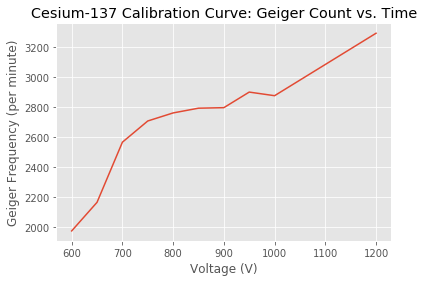

In [60]:
"""
=== PLOTTING CESIUM DATA ===

Here we look for a plateau in the relationship such that the Geiger Count is independent of applied Voltage.

"""

xs_calib = list(cesium_dict.keys())
ys_calib = []

def avg(list_in):
    avg = 0.0
    for i in list_in:
        avg += i
    
    avg /= len(list_in)
    
    return avg

for i in cesium_dict.values():
    ys_calib.append(avg(i))
    
    
# Plotting...
plt.plot(xs_calib, np.asarray(ys_calib)*60)
plt.title('Cesium-137 Calibration Curve: Geiger Count vs. Time')
plt.xlabel('Voltage (V)')
plt.ylabel('Geiger Frequency (per minute)')

plt.savefig('../figures/cesium-calibration-curve.png', dpi=300)

plt.show()

In [57]:
"""
=== BACKGROUND RADIATION DATA IMPORT ===

This script imports the data for background radioactivity at various Geiger-Mueller meter voltages.

Output is a dictionary with key/values {`voltage`: [`frequency1`, `frequency2`, ..., `frequencyn`]}

Frequencies are measured in hertz.

"""

path = '../data/background/background-'
background_dict = {}

for i in range(500, 1201, 50):
    try:
        tmp_df = pd.read_csv(str(path + str(i) + '.txt'), sep='\t')[1:]
        tmp_df.columns = ['count']

        tmp_df = tmp_df['count'].tolist()

        for j in range(len(tmp_df)):
            tmp_df[j] = float(tmp_df[j])/15 # divide by 15 because each test was 15 seconds long

        background_dict.update({i: tmp_df})
    except:
        pass

print('Completed extracting background data...')

Completed extracting background data...


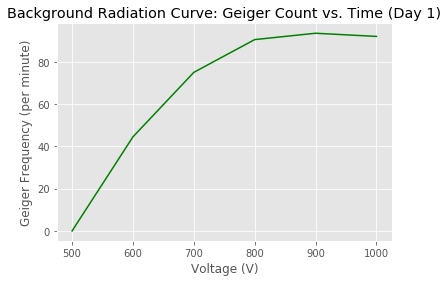

In [59]:
"""
=== PLOTTING BACKGROUND RADIATION DATA ===

Here we look for the relationship between measured background radiation and applied voltage.

Based on the Cesium-137 calibration graph, the region between 800 and 1000 volts is of particular interest.

"""

xs_bg = list(background_dict.keys())
ys_bg = []

for i in background_dict.values():
    ys_bg.append(avg(i))
    
    
# Plotting...
plt.plot(xs_bg, np.asarray(ys_bg)*60, 'g')
# plt.plot(xs_calib[0:len(xs_calib)-1], ys_calib[0:len(ys_calib)-1], 'r')
plt.title('Background Radiation Curve: Geiger Count vs. Time (Day 1)')
plt.xlabel('Voltage (V)')
plt.ylabel('Geiger Frequency (per minute)')

plt.savefig('../figures/background-radiation-voltage-curve.png', dpi=300)

plt.show()

# Model Part I: Background Radiation Measurement and Analysis

This part of the analysis involves calculating the background beta radiation within a margin of error of +/- 1 tick per minute.

The error in the number of ticks for a given data collection run is given by $\sqrt{n}$, where $n$ is the total number of ticks measured. 

Conditions for background data measurement are meant to be as similar as possible to those of the actual experiment, so data from `day 2` of experimentation will be used. Data was collected for both 700V and 800V in the Geiger-Mueller counter. The 800V data will be used as that is closer to the plateau regions noted on the above graphs.

## Data Sources & Timing

* `/background-day2/700V-1.txt`: 20 second intervals for 8 minutes.
* `/background-day2/700V-2.txt`: 20 second intervals for 8 minutes.
* `/background-day2/800V-1.txt`: 20 second intervals for 19-20 minutes.

Given that the majority of the filter paper data was taken at 800V in the Geiger-Mueller counter, the 800V background data from `/background-day2/800V-1.txt` will be used.


In [21]:
"""
=== GETTING BACKGROUND DATA FOR DAY 2 ===

The output of this scriptis a list of floats that represent the number of Geiger-Mueller counts 
for each of the 20-second intervals.

There is a severe data outlier in the final time interval (84 compared to an average of ~10). This
data point is removed, making for a total time of `18 minutes and 40 seconds`.

"""

path = '../data/background-day2/800V-1.txt'
background_dict = {}

tmp_df = pd.read_csv(path, sep='\t')[1:]
tmp_df.columns = ['count']

tmp_df = tmp_df['count'].tolist()

for j in range(len(tmp_df)):
    tmp_df[j] = float(tmp_df[j]) # Note that each trial was 20 seconds long

background_data = tmp_df


# Removing anomalous final data point
background_data.pop()

# Printing results
print('\n\nCompleted extracting background data:\n\n')

print(background_data)

print('\n\nLength of the output list is {} making for a total recorded time of {} minutes'
      .format(len(background_data), len(background_data)*20/60))



Completed extracting background data:


[9.0, 8.0, 10.0, 8.0, 8.0, 11.0, 6.0, 7.0, 7.0, 14.0, 8.0, 13.0, 13.0, 12.0, 9.0, 18.0, 8.0, 9.0, 8.0, 10.0, 3.0, 14.0, 8.0, 10.0, 11.0, 11.0, 16.0, 15.0, 11.0, 8.0, 6.0, 11.0, 9.0, 8.0, 11.0, 11.0, 14.0, 10.0, 10.0, 8.0, 13.0, 16.0, 14.0, 10.0, 17.0, 10.0, 12.0, 9.0, 13.0, 13.0, 11.0, 7.0, 14.0, 12.0, 9.0, 10.0]


Length of the output list is 56 making for a total recorded time of 18.666666666666668 minutes


In [32]:
"""
=== PROCESSING BACKGROUND RADIATION (DAY 2) ===

Here we take the background data and computer the average number of ticks per minute along with the error for
that measurement.
"""

# Computing the average number of ticks per minute:

num_minutes = len(background_data)*20.0/60.0
num_ticks = sum(background_data)

ticks_per_minute = num_ticks / num_minutes

# Computing the error for the average number of ticks per minute:

total_ticks_error = math.sqrt(num_ticks)
ticks_per_minute_error = total_ticks_error / num_minutes

print('The average number of ticks for minute for background radiation measurement was: {} +/- {} ticks per minute'
     .format(round(ticks_per_minute, 3), round(ticks_per_minute_error, 3)))

The average number of ticks for minute for background radiation measurement was: 31.661 +/- 1.302 ticks per minute


# Model Part II: Eliminating Decay of Long-Lived Isotopes

For this investigation, the short-lived isotopes that are active within the first 30 minutes of analysis are of interest. In the raw data, this behavior is clouded by the activity of longer-lived isotopes that are active beyond the 30 minute mark as well. 

Therefore, a linear fit will be applied to the post-30-minute data to model the activity of the longer-lived isotopes. **If the linear fit is good**, then the values given by the model for the first 30 minutes of data will be subtracted from those first 30 minutes of data in order to isolate the relatively short-lived isotopes.

## Data Sources & Timing

* `/filter-paper/filter_paper1.txt`: 20 second intervals for 20 minutes.
* `/filter-paper/filter_paper2_800.txt`: 20 second intervals for 60 minutes.
* `/filter-paper/filter_paper3_800.txt`: 20 second intervals for 30 minutes.



Completed extracting filter data...


Length of the output list is 330 making for a total recorded time of 110.0 minutes


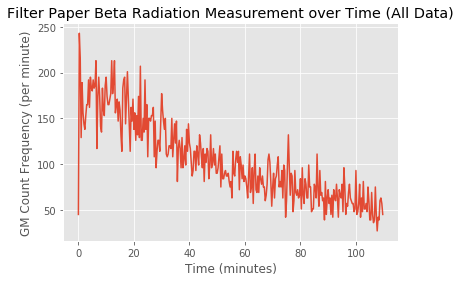

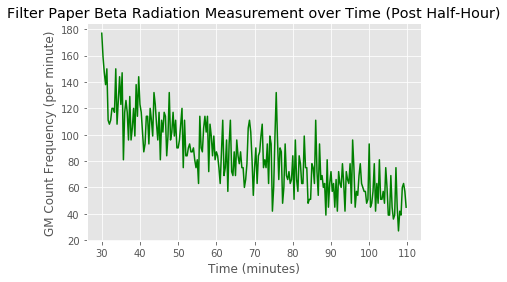

In [65]:
"""
=== GETTING THE FILTER PAPER RADIATION DATA ===
"""


paths = [
    '../data/filter-paper/filter_paper1.txt',
    '../data/filter-paper/filter_paper2_800.txt',
    '../data/filter-paper/filter_paper3_800.txt'
]

filter_data = []

for path in paths:
    tmp_df = pd.read_csv(path, sep='\t')[1:]
    tmp_df.columns = ['count']

    tmp_df = tmp_df['count'].tolist()

    for j in range(len(tmp_df)):
        tmp_df[j] = float(tmp_df[j]) # Note that each trial was 20 seconds long

    filter_data += tmp_df


# Printing results
print('\n\nCompleted extracting filter data...\n\n')

print('Length of the output list is {} making for a total recorded time of {} minutes'
      .format(len(filter_data), len(filter_data)*20/60))

times = range(0, len(filter_data)*20, 20)


### Plotting... ###

filter_data_np = np.asarray(filter_data)
times_np = np.asarray(list(times), dtype=np.float32)

# Plot 1: All Filter Paper Radiation Data.

plt.plot(times_np/60, filter_data_np*3)
plt.title('Filter Paper Beta Radiation Measurement over Time (All Data)')
plt.xlabel('Time (minutes)')
plt.ylabel('GM Count Frequency (per minute)')

plt.savefig('../figures/filter-paper-all-time.png', dpi=300)

plt.show()

# Plot 2: Post-30 Minute Filter Paper Radiation Data

plt.plot(times_np[int(30*60/20):]/60, filter_data_np[int(30*60/20):]*3, 'g')
plt.title('Filter Paper Beta Radiation Measurement over Time (Post Half-Hour)')
plt.xlabel('Time (minutes)')
plt.ylabel('GM Count Frequency (per minute)')

plt.savefig('../figures/filter-paper-post-30-mins.png', dpi=300)

plt.show()